In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load MNIST data from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Convert pixel values from 0 to 255 to [0,1] range
x_train = x_train/255.
print (x_train.shape)
x_test = x_test/255.

(60000, 28, 28)


8


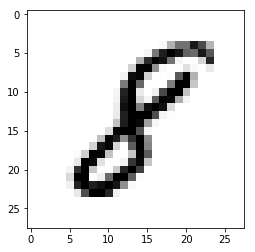

In [4]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
image = x_train[image_index]
plt.imshow(image, cmap='Greys')

(28, 28)

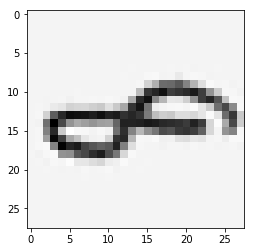

In [5]:
from scipy import ndimage, misc

rotated_x = ndimage.rotate(image, -45, reshape=False)
plt.imshow(rotated_x, cmap='Greys')
rotated_x.shape

In [6]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [7]:
new_y_train = np.array([1 if y > 4 else 0 for y in y_train])
new_y_test = np.array([1 if y > 4 else 0 for y in y_test])

In [8]:
# add noise to label

# I SKIP THIS STEP FOR NEW DATASET
# for i, y in enumerate(new_y_train):
#     if np.random.random() < 0.25:
#         new_y_train[i] = 1 - y

# for i, y in enumerate(new_y_test):
#     if np.random.random() < 0.25:
#         new_y_test[i] = 1 - y

In [9]:
n = 30000

In [10]:
new_y_train_dub = np.vstack((1 - new_y_train, new_y_train)).T
print(new_y_train_dub)
new_y_test_dub = np.vstack((1 - new_y_test, new_y_test)).T
new_y_test_dub

[[0 1]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]])

In [11]:
# study 1: 90 degrees left for y=0, 90 degrees right for y=1
# flip colors 80% of time
rotations_1 = np.copy(new_y_train[:n])
for i, c in enumerate(rotations_1):
    if np.random.random() < 0.8:
        rotations_1[i] = 1 - c


# study 2: 90 degrees right for y=0, 90 degrees left for y=1
# flip colors 80% of the time
rotations_2 = np.copy(new_y_train[n:2*n])
for i, c in enumerate(rotations_2):
    if np.random.random() < 0.2:
        rotations_2[i] = 1 - c


# # study 3: 45 degrees left for y=0, 135 degrees right for y=1
# # flip colors 80% of time
# rotations_3 = np.copy(new_y_train[2*n:3*n])
# for i, c in enumerate(rotations_3):
#     if np.random.random() < 0.8:
#         rotations_3[i] = 1 - c


# # study 4: 135 degrees right for y=0, 45 degrees left for y=1
# # flip colors 80% of the time
# rotations_4 = np.copy(new_y_train[3*n:4*n])
# for i, c in enumerate(rotations_4):
#     if np.random.random() < 0.2:
#         rotations_4[i] = 1 - c
        
# # study 5: 45 degrees left for y=0, 135 degrees right for y=1
# # flip colors 80% of time
# rotations_5 = np.copy(new_y_train[4*n:5*n])
# for i, c in enumerate(rotations_5):
#     if np.random.random() < 0.8:
#         rotations_5[i] = 1 - c


# # study 6: 135 degrees right for y=0, 45 degrees left for y=1
# # flip colors 80% of the time
# rotations_6 = np.copy(new_y_train[5*n:6*n])
# for i, c in enumerate(rotations_6):
#     if np.random.random() < 0.2:
#         rotations_6[i] = 1 - c


# # study 7: 135 degrees left for y=0, 45 degrees right for y=1
# # flip colors 80% of time
# rotations_7 = np.copy(new_y_train[6*n:7*n])
# for i, c in enumerate(rotations_7):
#     if np.random.random() < 0.8:
#         rotations_7[i] = 1 - c


# # study 8: 45 degrees right for y=0, 135 degrees left for y=1
# # flip colors 80% of the time
# rotations_8 = np.copy(new_y_train[7*n:8*n])
# for i, c in enumerate(rotations_8):
#     if np.random.random() < 0.2:
#         rotations_8[i] = 1 - c
        
        
# test: red for y=0, green for y = 1
# flip colors 50% of the time

rotations_test = np.copy(new_y_test[:n])
for i, c in enumerate(rotations_test):
    if np.random.random() < 0.5:
        pass
        # rotations_test[i] = 1 - c

In [12]:
#np.sum(np.abs(rotations_1 - new_y_train[:n]))
np.sum(np.abs(rotations_2 - new_y_train[n:2*n]))

5977

In [13]:
numstudies = 2

In [14]:
new_x_train = np.zeros((numstudies*n, 28, 28, 3))
print new_x_train.shape
new_x_test = np.zeros((n, 28, 28, 3))
print new_x_test.shape

(60000, 28, 28, 3)
(30000, 28, 28, 3)


In [15]:
x = np.random.randint(0, 360)
print(x)

300


In [16]:
# study 1
for i in range(n):
#     degree = np.random.randint(0, 360)
    x_img = x_train[i]
#     rotated_img = ndimage.rotate(x_img, degree, reshape=False)
#     img = np.reshape(rotated_img, (28, 28, 1))
#     new = np.concatenate([img, img, img], axis=2)
    if rotations_1[i] == 0: # rotate 45 degrees left
        rotated_img = ndimage.rotate(x_img, -90, reshape=False)
        img = np.reshape(rotated_img, (28, 28, 1))
        new = np.concatenate([img, img, img], axis=2)
    else: # rotate 45 degrees right
        rotated_img = ndimage.rotate(x_img, 90, reshape=False)
        img = np.reshape(rotated_img, (28, 28, 1))
        new = np.concatenate([img, img, img], axis=2)
    new_x_train[i] = new
    
# study 2
for i in range(n):
#     degree = np.random.randint(0, 360)
    x_img = x_train[n+i]
#     rotated_img = ndimage.rotate(x_img, degree, reshape=False)
#     img = np.reshape(rotated_img, (28, 28, 1))
#     new = np.concatenate([img, img, img], axis=2)
    if rotations_2[i] == 0: # rotate 45 degrees left
        rotated_img = ndimage.rotate(x_img, -90, reshape=False)
        img = np.reshape(rotated_img, (28, 28, 1))
        new = np.concatenate([img, img, img], axis=2)
    else: # rotate 45 degrees right
        rotated_img = ndimage.rotate(x_img, 90, reshape=False)
        img = np.reshape(rotated_img, (28, 28, 1))
        new = np.concatenate([img, img, img], axis=2)
    new_x_train[n+i] = new

# # study 3
# for i in range(n):
#     x_img = x_train[i]
#     if rotations_3[i] == 0: # rotate 0 degrees left
#         rotated_img = ndimage.rotate(x_img, 0, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     else: # rotate 180 degrees right
#         rotated_img = ndimage.rotate(x_img, 180, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     new_x_train[2*n+i] = new
    
# # study 4
# for i in range(n):
#     x_img = x_train[i]
#     if rotations_4[i] == 0: # rotate 0 degrees left
#         rotated_img = ndimage.rotate(x_img, 0, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     else: # rotate 180 degrees right
#         rotated_img = ndimage.rotate(x_img, 180, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     new_x_train[3*n+i] = new

# # study 5
# for i in range(n):
#     x_img = x_train[i]
#     if rotations_5[i] == 0: # rotate 45 degrees left
#         rotated_img = ndimage.rotate(x_img, -45, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     else: # rotate 135 degrees right
#         rotated_img = ndimage.rotate(x_img, 135, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     new_x_train[4*n+i] = new
    
# # study 6
# for i in range(n):
#     x_img = x_train[i]
#     if rotations_6[i] == 0: # rotate 45 degrees left
#         rotated_img = ndimage.rotate(x_img, -45, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     else: # rotate 135 degrees right
#         rotated_img = ndimage.rotate(x_img, 135, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     new_x_train[5*n+i] = new

# # study 7
# for i in range(n):
#     x_img = x_train[i]
#     if rotations_7[i] == 0: # rotate 135 degrees left
#         rotated_img = ndimage.rotate(x_img, -135, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     else: # rotate 45 degrees right
#         rotated_img = ndimage.rotate(x_img, 45, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     new_x_train[6*n+i] = new
    
# # study 8
# for i in range(n):
#     x_img = x_train[i]
#     if rotations_8[i] == 0: # rotate 135 degrees left
#         rotated_img = ndimage.rotate(x_img, -135, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     else: # rotate 45 degrees right
#         rotated_img = ndimage.rotate(x_img, 45, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     new_x_train[7*n+i] = new
    
# test
for i in range(10000):
    degree = np.random.randint(0, 360)
    x_img = x_test[i]
    rotated_img = ndimage.rotate(x_img, degree, reshape=False)
    img = np.reshape(rotated_img, (28, 28, 1))
    new = np.concatenate([img, img, img], axis=2)
#     if rotations_test[i] == 0: # rotate 45 degrees left
#         rotated_img = ndimage.rotate(x_img, -45, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
#     else: # rotate 45 degrees right
#         rotated_img = ndimage.rotate(x_img, 45, reshape=False)
#         img = np.reshape(rotated_img, (28, 28, 1))
#         new = np.concatenate([img, img, img], axis=2)
    new_x_test[i] = new

In [17]:
np.mean(np.mean(np.mean(new_x_test, axis=0), axis=0), axis=0)

array([0.04416447, 0.04416447, 0.04416447])

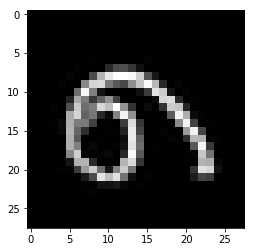

In [18]:
#plt.imshow(new_x_train[n+10])
plt.imshow(new_x_test[100])

In [19]:
# new_attr_train =  np.concatenate( [ np.vstack([np.ones(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)]).T,
#                                    np.vstack([np.zeros(n), np.ones(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)]).T,
#                                    np.vstack([np.zeros(n), np.zeros(n), np.ones(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)]).T,
#                                    np.vstack([np.zeros(n), np.zeros(n), np.zeros(n), np.ones(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)]).T,
#                                    np.vstack([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.ones(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)]).T,
#                                    np.vstack([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.ones(n), np.zeros(n), np.zeros(n), np.zeros(n)]).T,
#                                    np.vstack([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.ones(n), np.zeros(n), np.zeros(n)]).T,
#                                    np.vstack([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.ones(n), np.zeros(n)]).T ])
new_attr_train =  np.concatenate( [ np.vstack([np.ones(n), np.zeros(n), np.zeros(n)]).T, 
                                   np.vstack([np.zeros(n), np.ones(n), np.zeros(n)]).T])

print(new_attr_train)
print(len(new_attr_train))
print(new_attr_train.shape)

new_attr_test = np.vstack([np.zeros(n), np.zeros(n), np.ones(n)]).T
# new_attr_test = np.vstack([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.ones(n)]).T
print(new_attr_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
60000
(60000, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [20]:
new_x_train_reshape = np.reshape(new_x_train, (numstudies*n, 28*28*3))
new_x_test_reshape = np.reshape(new_x_test, (n, 28*28*3))
new_x_test_reshape.shape
#print(new_x_train_reshape.shape)

(30000, 2352)

In [21]:
new_y_train_reshape = new_y_train_dub[:numstudies*n]
print(new_y_train_reshape.shape)
new_y_test_reshape = new_y_test_dub[:n]
new_y_test_reshape.shape

x_test = new_x_test_reshape[:n * numstudies]
x_test.shape

(60000, 2)


(30000, 2352)

In [22]:
numstudies = 2
inds_shuffled = np.random.permutation(numstudies*n)
train_inds = inds_shuffled[:int(.8 * numstudies*n)]
valid_inds = inds_shuffled[int(.8 * numstudies*n):]
print(len(train_inds), len(valid_inds))

(48000, 12000)


In [23]:
num = n * numstudies
save_file = 'rotated_mnist_90degrees_digit100_rotation80flipped_random_test_30k_041720.npz'
np.savez(save_file, 
         x_train = new_x_train_reshape[:num], 
         x_test = new_x_test_reshape[:num], 
         y_train = new_y_train_reshape[:num], 
         y_test = new_y_test_reshape[:num], 
         attr_train = new_attr_train[:num],
         attr_test = new_attr_test[:num],
         train_inds = train_inds,
         valid_inds = valid_inds)

'''
np.savez('mnist_nonoise_072219.npz', 
         x_train = new_x_train_reshape, 
         x_test = new_x_test_reshape, 
         y_train = new_y_train_reshape, 
         y_test = new_y_test_reshape, 
         attr_train = new_attr_train,
         attr_test = new_attr_test,
         train_inds = train_inds,
         valid_inds = valid_inds)
'''

"\nnp.savez('mnist_nonoise_072219.npz', \n         x_train = new_x_train_reshape, \n         x_test = new_x_test_reshape, \n         y_train = new_y_train_reshape, \n         y_test = new_y_test_reshape, \n         attr_train = new_attr_train,\n         attr_test = new_attr_test,\n         train_inds = train_inds,\n         valid_inds = valid_inds)\n"